# pands_project: Iris Data set analysis

### Author: Lais Coletta

#### Iris data set
 


This project aims to analyse Iris flower or Fisher’s Iris data set and explore different plotting types. I downloaded the CSV file from the Github repository https://github.com/joeyajames/Python/blob/master/Iris%20Dataset/iris.data. The Iris flower data set contains the sepal length, sepal width, petal length, and petal width of 3 species of flowers, Iris Setosa, Versicolor, and Virginica. The following table is an overview of the variables extracted from the CSV file:

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#call a function that stops showing the warning boxes in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('iris_csv.csv')
print (df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## Statistical Insights

For a statistical overview, I will use the describe() function. This function is used to generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. The definition of each parameter we have when calling this function are:

<i>count - The number of not-empty values;
mean - The average (mean) value;
std - The standard deviation;
min - the minimum value;
25% - The 25% percentile*;
50% - The 50% percentile*;
75% - The 75% percentile*;
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

 Reference: w3resource.com/pandas/dataframe/dataframe-describe.php) </i>

In [59]:
df.describe ()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Using the value_counts() function, I organized by species of flowers. We have exactly 50 of each species, Iris Setosa, Iris Versicolor, and Iris Virginica.

In [60]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Visualization

## Species count

In this histogram I am using the countplot() function to analyse the data distribution. The conclusion is that the species count is well balanced and each species has 50 as its data count. 

<AxesSubplot:title={'center':'Species Count'}, xlabel='species', ylabel='count'>

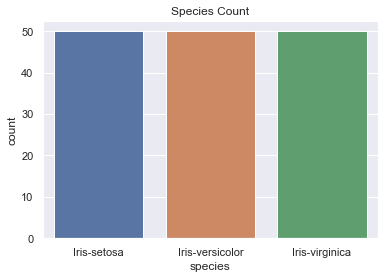

In [61]:
plt.title ('Species Count')
sns.countplot(df['species'])

## Data visualization of each attribute using histograms

In the following histogram, we can compare the amount of data concentrated on each attribute, the length, and the width of sepal and petal attributes, in centimeters. Sepal width is by far the attribute with the highest amount of data with approx. 3 cm, and lies in the middle of the graph with an average size between approx. 2 and 4.4cm. That shows that the values for sepal width are more concentrated and don't vary as much as the other species. Petal length, on the other hand, is the attribute with the most distributed range, with values from approx. 1.3 to 6.9. Sepal length presents the highest amount of features with larger sizes and petal width with smaller sizes.

Text(0, 0.5, 'Count')

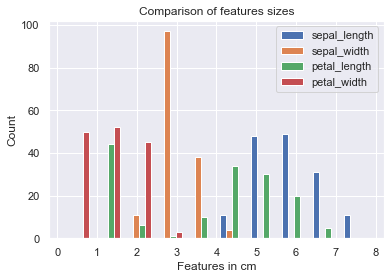

In [62]:
plt.hist([df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']])
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.legend(labels)
plt.title('Comparison of features sizes')
plt.xlabel("Features in cm")
plt.ylabel("Count")


<b> Subplots for each attribute </b>

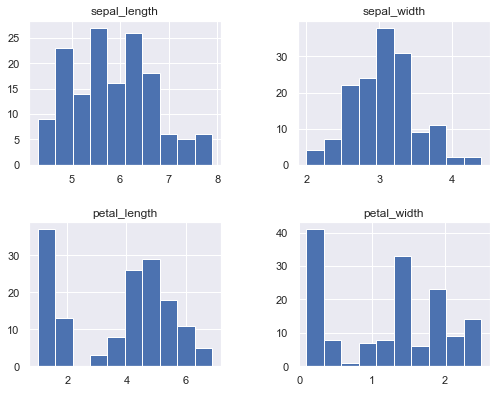

In [63]:
#plt.subplots() is a function that returns a tuple containing a figure and axes objects, 'unpacking' this tuple into the variables fig and ax. (source: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python )
# (2,2) - returns 4 graphs, 2 each row
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0, 0].hist(df['sepal_length'])
ax[0, 0].set_title('sepal_length')

ax[0, 1].hist(df['sepal_width'])
ax[0, 1].set_title('sepal_width')

ax[1, 0].hist(df['petal_length'])
ax[1, 0].set_title('petal_length')

ax[1, 1].hist(df['petal_width'])
ax[1, 1].set_title('petal_width')

# setting the spacing between subplots (reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

By creating four subplots, we break the data down and it is easier to analyze how the data is distributed between the different attributes. It is important to highlight that the scale changes between plots, which makes it a bit more complicated to compare, but still very useful when observing patterns. Sepal Width, for example, has higher values in the middle of the graph, with its highest amount of data located between 3.0 and 3.3. In petal length and width graphs, on the other hand, there is a gap between the sizes. Sepal length presents the biggest size (almost 8mm) and the amount distribution changes less than the other features (9 to 28 approx.).

To help with the data visualization and to add more information to thses subplots, we can incorporate color differentiation by species using seaborn: 

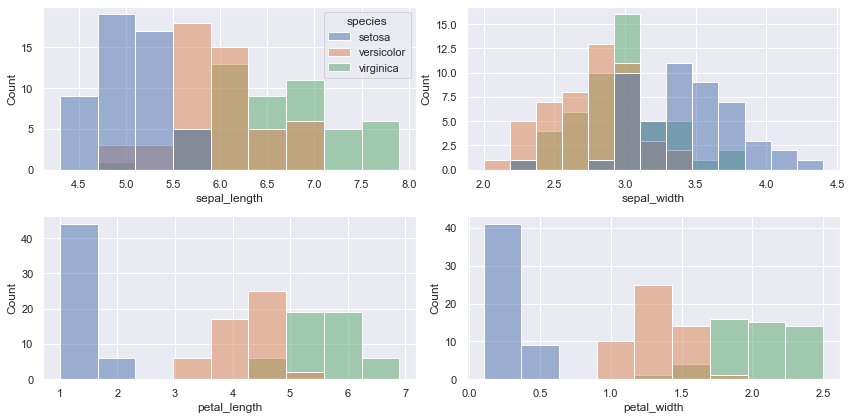

In [64]:
#reference: https://stackoverflow.com/questions/67300148/best-fit-to-a-histogramplot-iris
iris = sns.load_dataset('iris')
iris['species'] = pd.Categorical(iris['species'])
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
#for loop through every column (0 to 4)
for col, ax in zip(iris.columns[:4], axs.flat):
    # seaborn histogram function. Hue determines which data we are selecting to be colored.
    sns.histplot(data=iris, x=col, hue='species', common_norm=False, legend=ax==axs[0,0], ax=ax)
plt.tight_layout()

Using the same program that I wrote in the previous graph, we can add a KDE curve into the function histoplot(). I found this resource in the seaborn documentation and it is useful in case we want to analyse the data behavior. <i>A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset. KDE represents the data using a continuous probability density curve in one or more dimensions. 
Reference: https://seaborn.pydata.org/generated/seaborn.kdeplot.html) </i>

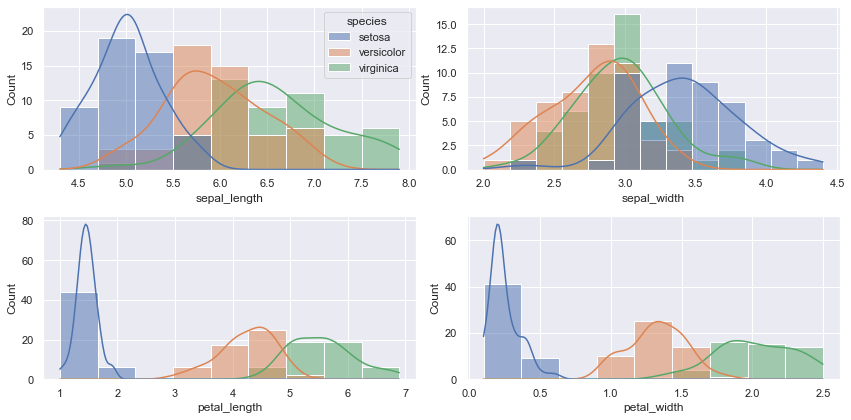

In [65]:
iris = sns.load_dataset('iris')
iris['species'] = pd.Categorical(iris['species'])
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
#for loop through every column (0 to 4)
for col, ax in zip(iris.columns[:4], axs.flat):
    # seaborn histogram function. Hue determines which data we are selecting to be colored.
    sns.histplot(data=iris, x=col, kde=True, hue='species', common_norm=False, legend=ax==axs[0,0], ax=ax)
plt.tight_layout()

## Comparison of attributes by species using box plots

Another way to compare the variables is by using Box plots. This type of graph shows the distribution of data over an attribute by presenting the 25th, 50th (median), and 75th percentiles. Box plots are useful in cases when you have multiple data sets (such as species) that are related to each other (features). This graph represents the same data that we saw in the first session of this project, the calculation 'count' in the describe() function. In the following plot we can compare the species by features and also analyse where the average value is situated:

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

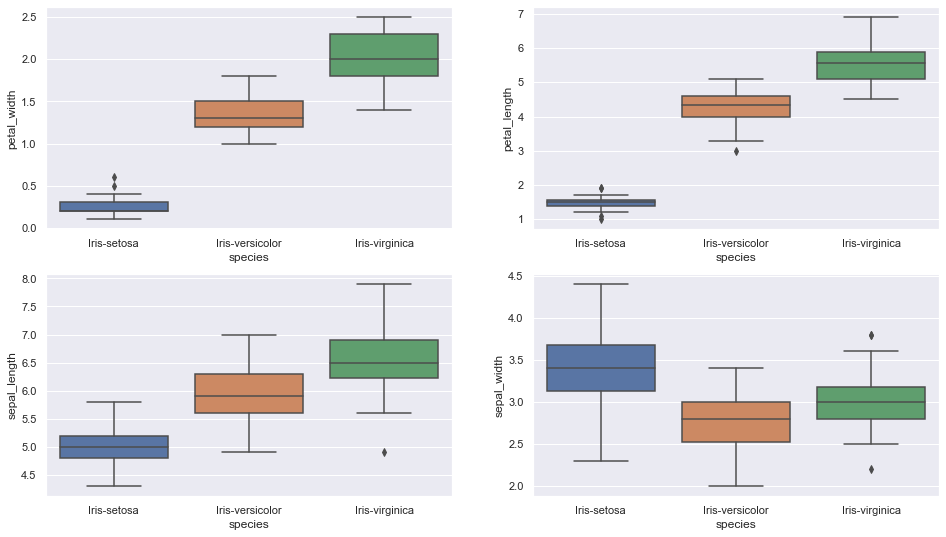

In [66]:
#reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal_width', x= 'species', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y='petal_length', x= 'species', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y='sepal_length', x= 'species', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y='sepal_width', x= 'species', data=df, orient='v' , ax=axes[1, 1])

These type of subplots has different scales, similar to the histogram subplots, and I couldn't find a way to insert the same scale values into the plot. In my point of view, this makes the plot less intuitive to read and compare between attributes. However, we can still easily see that in the first three plots Iris Setosa has the smallest attributes and is the least distributed feature, Iris Versicolor is distributed in an average manner and with average values, while Iris Virginica is also well distributed but with the largest values. There is less variability in petal widths values when compared to the variability in the petal length. In the last graph for the sepal width attribute, Iris Setosa has the highest value and is distributed similarly to Versicolor. Iris Virginica has less variation in data with the average value set at 3.0. The Iris Virginica has the largest average petal length which is almost four times greater than the petal length of the Iris Setosa. The average petal length for the Iris Versicolor is not very different from the Iris Versicolor.

## Comparison of species by attributes using scatter plots

<b> Comparison based on sepal lenght and width using scatter plot </b>

A scatter plot uses dots to represent the variable values. <i>The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

Reference: https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot </i> 

In this scatter plot, we can understand that the Iris Setosa species has a smaller sepal lenght but higher width. The values are very concententrated and do not mix with the other attributes. Iris Versicolor has an average size of sepal lenght and the smallest sepal width, between 2.0 and aprox. 3.4, and Iris Virginica has a larger sepal length overall.

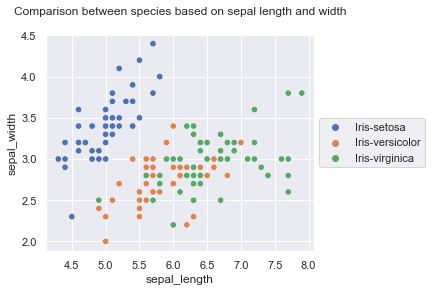

In [87]:
iris = sns.load_dataset('iris')
#add space between title and graph (y)
plt.title('Comparison between species based on sepal length and width', y=1.06)
#'s' in the scatterplotfunction is to change the size of the dots
sns.scatterplot(df['sepal_length'],df['sepal_width'],hue =df['species'],s=40)
ax = plt.subplot(111)

# Shrinking plot width by 20% to fit legend box outside the axis of the figure (source: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot-in-matplotlib)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


<b> Comparison between species based on petal length and width <b>

When comparing the petal attributes between species using a his scatter plot, we can easily see that Iris Setosa has the smallest petal length and width followed by Irish Versicolor and Iris Virginica. This graph also shows that the petal size can be an attribute used to differentiate those species as they tend to follow a pattern of small (much easier to distinguish), medium, and large petals.

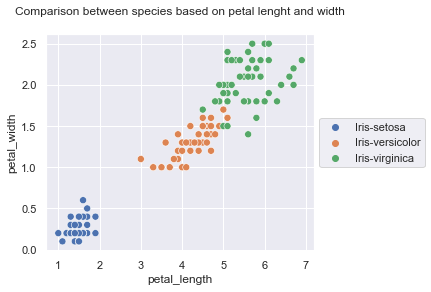

In [68]:
plt.title('Comparison between species based on petal lenght and width', y=1.06)
sns.scatterplot(df['petal_length'], df['petal_width'], hue = df['species'], s= 50)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Another way to analyse scatter plots is by calling the pairplot() function, which, according to the seaborn documentation, <i>"By default, this function will create a grid of Axes such that each numeric variable in data will be shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column". 
Reference: https://seaborn.pydata.org/generated/seaborn.pairplot.html </i>

Therefore, we can compare the scatter plots side by side and the diagonal plots are showing the data distribution for each attribute:

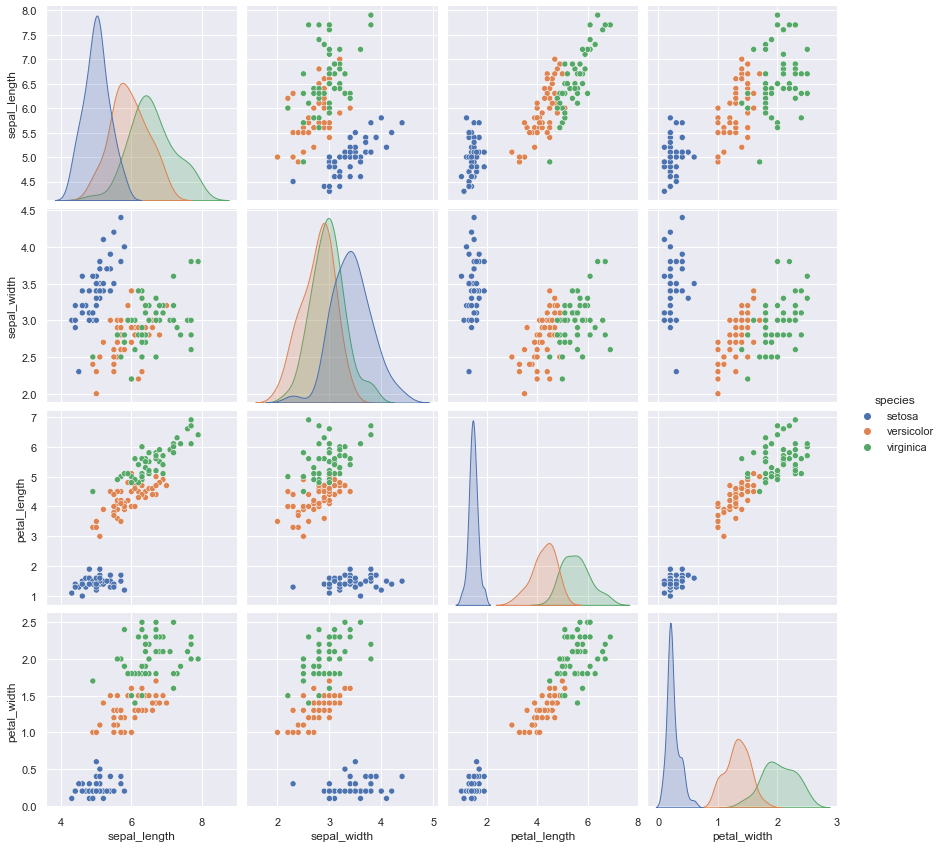

In [90]:
#function taken from the seaborn documentation https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot
sns.pairplot(iris,hue="species",height=3)

I found this way to represent the data very useful and easy to compare each attribute in a tidier way. Also, it is clearer now how the Iris Setosa species is different when compared to the other two species. Iris Setosa is always separated from the others while the other two attributes seem to overlap in most of the graphs.

### Heatmaps

A heatmap is a type of graph where each value of a matrix is represented as a color in two dimensions. Using the seaborn.heatmap() function, we can build a rectangular plot with a color encoded matrix. <i>"This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap unless cbar is False or a separate Axes is provided to cbar_ax.
Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap </i>

The following heatmat show us the correlation between all the variables in one plot: 

<AxesSubplot:>

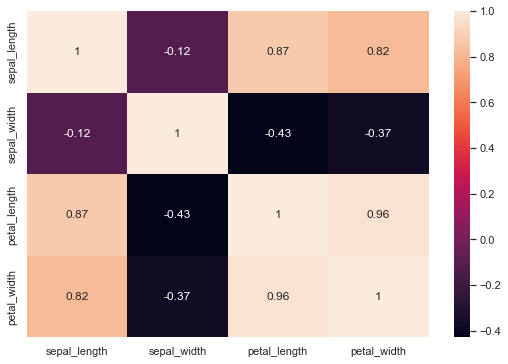

In [70]:
f, ax = plt.subplots(figsize=(9, 6))
#corr () is used to find the pairwise correlation of all columns in the dataframe. If anoot is True, it writes the data value in each rectangle.
sns.heatmap(iris.corr(),annot=True)

Understanding the correlation of variables is the same as comparing how much they are similar to one another. The highest correlation here is between petal length and width, with 96% followed by petal length and sepal length. The darker tones are representing the features with the lowest correlations, which are petal width and sepal width, followed by petal length and sepal width. We can also see that sepal width is the attribute with the lowest number of correlations.

This representation can also be made by calling the function data.corr() which will show those values organised in a table:

In [71]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Other Iris Dataset Analysis

In this session of the project, I will bring a few different graphs from other Iris data set analyses to discuss its usability for analysis and readability purposes.

Plots can, sometimes, be more complex but not necessarily more effective while reading the data. In this analysis made on the website stackoverflow.com, the author suggests the use of the module facetgrid, or subplots in sns, to create colormaps with a legend on the side. The link where I am copying this function is https://stackoverflow.com/questions/44641669/scatterplot-with-point-colors-representing-a-continuous-variable-in-seaborn-face.

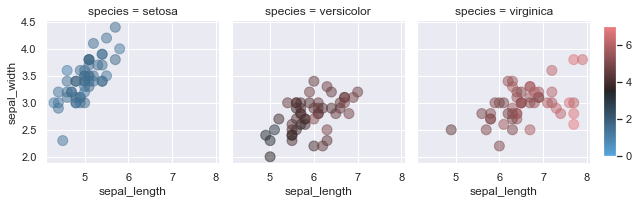

In [72]:
g = sns.FacetGrid(iris, col='species', palette = 'seismic')

def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

vmin, vmax = 0, 7
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

g = g.map(facet_scatter, 'sepal_length', 'sepal_width', "petal_length",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

Scatter plots are a great option when comparing different variables in the same plot. In this case, there is a lot of information to be shwon in only three plots and I personally would have broken the information into different graphs. To present a clearer analysis to people that are not familiar with the data set, I would have not chosen this time of the plot. There is a lot of information to pay attention to, such as species, sepal width, and length. Adding the colors while we can read that information by looking at the axes can make these graphs a little more crowded and difficult to understand as we have three other variable to undertand.

Another way to represent the data, which is similar to box plots, is by Violin plots. This analysis made by Aditya Jetely on towardsdatascience.com shows how this type of plot is useful to analyse the shape of the data density while comparing attributes.

<i>A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution. 

Reference: https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violing) </i>

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

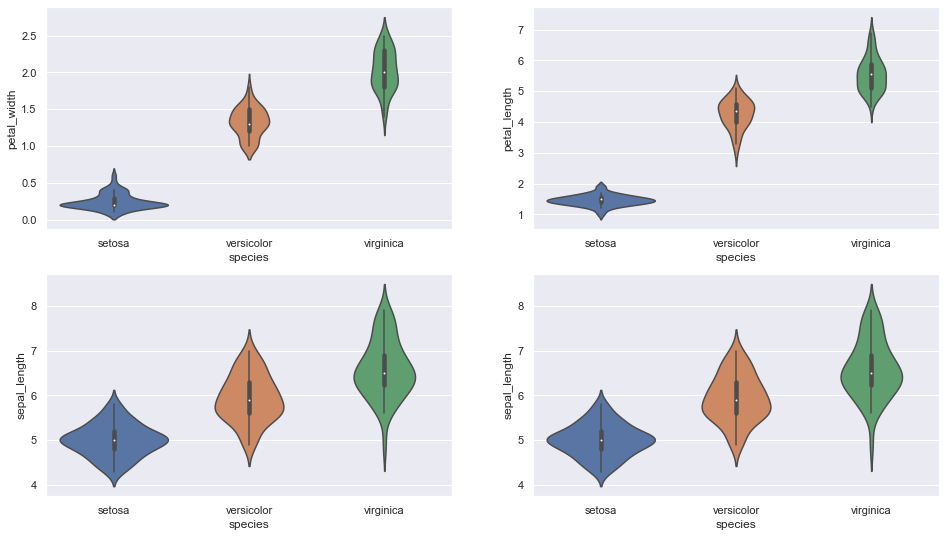

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal_width", x= "species", data=iris,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal_length", x= "species", data=iris,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal_length", x= "species", data=iris,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal_length", x= "species", data=iris,  orient='v' , ax=axes[1, 1])

This type of plot is easier to read than the box plot in my point of view as we can visualize clearer the density pattern of the features. For example, Iris Setosa tends to be shorter with higher density in the middle while Virginica is better distributed while represented by a longer shape.

In the following graph, the author Kimberly Staudt in kaggle.com chose to use hexagonal shapes colored in green to represent the correlation between sepal length and width. What called my attention in this graph, was the external 'histograms' that a joint.plot function creates. The darker tons of green are showing the density of the data and the external plots represent each variable separately. In the Iris data frame, there are 150 pieces of information to be analysed, this kind of plot can be very useful when the data frame is bigger than Iris and it is great if we want just an overview of the variables for a report or presentation, as it looks good.

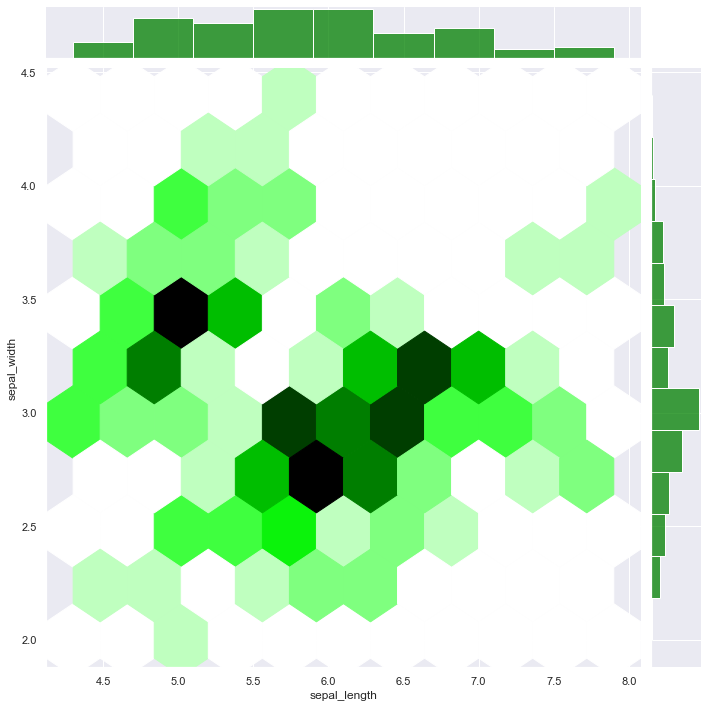

In [74]:
#source: https://www.kaggle.com/code/kstaud85/iris-data-visualization/notebook
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=10,ratio=10, kind='hex',color='green')


## Conclusion

In this project, I focused on exploring different ways of data visualization that pandas and seaborn modules offer. By analysing this data I understood mainly the correlations of each attribute and what are the most effective ways to analyse and represent the data. In my perception, the graphs with the best visualization of this Iris data set were scatter, pairplots and histograms divided into species.

Color and sizes are also important tools for data visualization, it plays an important role in making a plot more readable and attractive. The heatmap, for example, was a very interesting way to see the relationship between features. A strong correlation is present between petal width and petal length and the map coloring choices make those conclusions easier to spot.

While researching other analyses and adding them to this project, it was interesting to see the amount of data visualization options that are available to be used in python. I tried to install plotly which is a tool that creates even more interactive plots with other editing features. However, this is a tool that requires the user to upload the graphs to their website in order to download it and it wouldn't work for the purposes of this project.

It has been more than a month since I started this project and it is a learning experience in which I believe I will use a lot while doing reports and analysis, even if not using python. I learned a lot about data visualization and interpretation which are unfamiliar fields to me and I am looking forward to continuing to explore this path.